In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## A2/phi vs R - GADGET

In [16]:
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import barstrength2 as strng

h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter

atime = np.loadtxt('/home/ornela/SimCLUES/redshift_outputs.txt')
aexp = atime[:,2]
aexp = aexp[::-1]

vector = ('00','01','03')
vector3 = ('M31','MW','M33')
vector2= ('blue', 'red', 'green')

snap = h5py.File('/home/ornela/SimCLUES/outputs_1/snap_496.h5py', 'r')
    
for i in range(0,1):
    cm   = snap['subhalo_0'+ str('%s' %vector[i])+ '/Center'].value
    r200 = snap['subhalo_0'+ str('%s' %vector[i])+ '/R200'].value

    pstr = snap['subhalo_0'+ str('%s' %vector[i]) + '/Str/Coordinates'].value
    mstr = snap['subhalo_0'+ str('%s' %vector[i]) + '/Str/Masses'].value
    vel  = snap['subhalo_0'+ str('%s' %vector[i]) + '/Str/Velocities'].value

    z = a0/aexp[0] - 1.
    Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)

#---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = (pstr[:,0]-cm[0])*aexp[0]/h
    ystr = (pstr[:,1]-cm[1])*aexp[0]/h
    zstr = (pstr[:,2]-cm[2])*aexp[0]/h
    r    = np.sqrt(xstr**2+ystr**2+zstr**2)

    v_x = vel[:,0] *np.sqrt(aexp[0]) + Ht *xstr/1000.
    v_y = vel[:,1] *np.sqrt(aexp[0]) + Ht *ystr/1000.
    v_z = vel[:,2] *np.sqrt(aexp[0]) + Ht *zstr/1000.

#----------------------masas----------------------------
    mstr = mstr/h

    r200 = r200*aexp[0]/h

    rgal=0.15*r200

    limit = np.where(r<rgal)
    r_sort = np.sort(r[limit])
    r_indice = np.argsort(r[limit])

    Mc_str = cumsum((mstr[limit])[r_indice])
    M_gal = Mc_str[-1]

#------------------ calculamos M90------------------------------------------
    razon = Mc_str/M_gal
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)

    r90 = r_sort[noventa][-1]
    r50 = r_sort[cincuenta][-1]            

#-------------------------------------------------------------------            
    corte1,=np.where(r<6)
    corte2,=np.where(r<2*r50)
    veloc,=np.where(r<r50)

#----------componentes de la velocidad del centro de masa------------
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

#----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,r90)

    xn = e1x*xstr + e1y*ystr + e1z*zstr
    yn = e2x*xstr + e2y*ystr + e2z*zstr
    zn = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz

  
    A2max, rmax, phimax = strng.a2max(mstr[corte1], xn[corte1], yn[corte1], 20)
    print 'phimax=', phimax, 'A2max=', A2max, 'rbinmax=', rmax
    
    A2, phi, rbin = strng.a2(mstr[corte1], xn[corte1], yn[corte1], 20)

    print 'phi=', phi, 'A2=', A2, 'rbin=', rbin
    
#     phii = phi - phimax

#     data = np.ndarray([np.size(A2),3])
#     data[:,0] = rbin
#     data[:,1] = A2
#     data[:,2] = phii

#     np.savetxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd/_data/'+str('%s'%vector3[i])+'_A2phivsR.dat', data, fmt=['%12.6f','%12.6f','%12.6f'])



phimax= -0.110129334033 A2max= 0.446131823118 rbinmax= 0.560534358025
phi= [-0.16062365 -0.11969174 -0.1123157  -0.09802422 -0.0989641  -0.11769029
 -0.12121914 -0.11012933 -0.11069939 -0.10768908 -0.1254354  -0.11574473
 -0.10689936 -0.13815638 -0.23309353  0.20550975  1.05794334  1.17820001
  0.94142306  0.76788342] A2= [ 0.06981804  0.18080868  0.26306777  0.31636667  0.36655798  0.41300232
  0.43297173  0.44613182  0.43003108  0.41855774  0.39211362  0.33176691
  0.26192637  0.16111374  0.07414268  0.01146322  0.04826994  0.05924361
  0.03563556  0.07384634] rbin= [ 0.08572909  0.15982583  0.22173831  0.2823419   0.34449476  0.41070825
  0.48190203  0.56053436  0.64854413  0.74829406  0.86600041  1.01281583
  1.20514464  1.46092141  1.79088378  2.18354702  2.64947343  3.23826408
  4.02267933  5.10684061]


In [166]:
print rbin


[ 0.08521866  0.16009676  0.22184488  0.28082374  0.34282392  0.40836608
  0.47923529  0.55712044  0.64398295  0.74371839  0.86275315  1.01479101
  1.21877682  1.49313354  1.83555841  2.24099016  2.71359396  3.34773874
  4.18018007  5.21822071]


## A2/phi vs R - GASOLINE

In [9]:
import h5py
import rotation as rot
import barstrength2 as strng

#Parámetros cosmológicos
#--------------------------------------------------------------------------
G = 4.299e-6
a0=1.
#---------------------------------------------------------------------------
vector =(1,2,4)
vector2=('M31','MW')

snapshot = np.loadtxt('/home/ornela/SimCLUES/Gasoline/snapshots.txt', dtype='string') #SNAPSHOTS
snapshot = snapshot[::-1]

for j in range(0,1):#len(snapshot)-1):
    
    snap = h5py.File('/home/ornela/SimCLUES/Gasoline/outputs2/snap_'+str('%s'%snapshot[j])+'.h5py', 'r')
    
    for i in range(0,2):
        cm   = snap['subhalo_00'+ str('%s' %vector[i])+ '/Center'].value
        r200 = snap['subhalo_00'+ str('%s' %vector[i])+ '/R200'].value
        time = snap['subhalo_00'+ str('%s' %vector[i])+ '/Time'].value
        h    = snap['subhalo_00'+ str('%s' %vector[i])+ '/h'].value
        aexp = snap['subhalo_00'+ str('%s' %vector[i])+ '/aexp'].value

        pstr = snap['subhalo_00'+ str('%s' %vector[i])+ '/Str/Coordinates'].value
        mstr = snap['subhalo_00'+ str('%s' %vector[i])+ '/Str/Masses'].value
        vel  = snap['subhalo_00'+ str('%s' %vector[i])+ '/Str/Velocities'].value

#paso las coordenadas al centro de la galaxia
        xstr = (pstr[:,0]-cm[0])
        ystr = (pstr[:,1]-cm[1])
        zstr = (pstr[:,2]-cm[2])
        r    = np.sqrt(xstr**2+ystr**2+zstr**2)
#----------------------------------------------------------------------

        rgal = 0.15*r200          #defino el radio de la galaxia

        limit = np.where(r<rgal)         #hago un límite de los r dentro de rgal
        r_sort = np.sort(r[limit])       #acomodo los r de menor a mayor
        r_indice = np.argsort(r[limit])  #saco los argumentos de r acomodados de menor a mayor

        Mc_str = cumsum(mstr[limit][r_indice])  #masa acumulada en cada radio dentro de rgal
        Mgal = Mc_str[-1]  #masa total de la galaxia

    #Calculo de los radios a 50% y 90% la masa de la galaxia
#-----------------------------------------------------------------------
        razon = Mc_str/Mgal 
        noventa, = np.where(razon < 0.9)
        cincuenta, = np.where(razon < 0.5)

        r90 = r_sort[noventa][-1]   #radio a 90% la masa
        r50 = r_sort[cincuenta][-1] #radio a 50% la masa
        
#-------------------------------------------------------------------------------
    #componentes de la velocidad del centro de masa
        veloc, = np.where(r < r50)

        vxcm = sum(mstr[veloc]*vel[:,0][veloc])/sum(mstr[veloc])
        vycm = sum(mstr[veloc]*vel[:,1][veloc])/sum(mstr[veloc])
        vzcm = sum(mstr[veloc]*vel[:,2][veloc])/sum(mstr[veloc])

    #velocidades de las estrellas respecto del centro de masa de la galaxia
        vx = vel[:,0] - vxcm
        vy = vel[:,1] - vycm
        vz = vel[:,2] - vzcm


    #hago la rotación de las coordenadas respecto del momento angular    
        e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,r90)

        xn = e1x*xstr + e1y*ystr + e1z*zstr
        yn = e2x*xstr + e2y*ystr + e2z*zstr
        zn = e3x*xstr + e3y*ystr + e3z*zstr
        vxn = e1x*vx + e1y*vy + e1z*vz
        vyn = e2x*vx + e2y*vy + e2z*vz
        vzn = e3x*vx + e3y*vy + e3z*vz

        corte3, = np.where(r<6)

        A2, phi, rbin = strng.a2(mstr[corte3], xn[corte3], yn[corte3], 20)
        A2max, rmax, phimax = strng.a2max(mstr[corte3], xn[corte3], yn[corte3], 20)
        
        print 'phimax=', phimax, 'A2max=', A2max, 'rbinmax=', rmax
        
        phii = phi - phimax

        data = np.ndarray([np.size(A2),3])
        data[:,0] = rbin
        data[:,1] = A2
        data[:,2] = phii

        np.savetxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gs/_data/'+str('%s'%vector2[i])+'_A2phivsR.dat', data, fmt=['%12.6f','%12.6f','%12.6f'])


phimax= 0.0285322032869 A2max= 0.412451531502 rbinmax= 0.542491674423
phimax= -0.735488474369 A2max= 0.46430081067 rbinmax= 0.480768501759


#### Gadget M31 lbar

In [10]:
M31_gd = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd/_data/M31_A2phivsR.dat')
rn_M31gd  = M31_gd[:,0]
A2_M31gd  = M31_gd[:,1]
phi_M31gd = M31_gd[:,2]

#lbar 1 ----------------------------------------------------------------------
for i in range(1,len(phi_M31gd)-1):
        if ((phi_M31gd[i]<np.arcsin(0.3)) & (phi_M31gd[i]>-np.arcsin(0.3)) & (phi_M31gd[i+1]>np.arcsin(0.3))):
            if ((phi_M31gd[i+2]>np.arcsin(0.3)) | (phi_M31gd[i+2]<-np.arcsin(0.3))):
                pend = (phi_M31gd[i+1]-phi_M31gd[i])/(rn_M31gd[i+1]-rn_M31gd[i])
                ordenada = phi_M31gd[i]- pend*rn_M31gd[i]
                lbar_M31gd = (np.arcsin(0.3) - ordenada)/pend
                break
        elif ((phi_M31gd[i]>-np.arcsin(0.3)) & (phi_M31gd[i]<np.arcsin(0.3)) & (phi_M31gd[i+1]<-np.arcsin(0.3))):
            if ((phi_M31gd[i+2]>np.arcsin(0.3)) | (phi_M31gd[i+2]<-np.arcsin(0.3))):
                pend = (phi_M31gd[i+1]-phi_M31gd[i])/(rn_M31gd[i+1]-rn_M31gd[i])
                ordenada = phi_M31gd[i]- pend*rn_M31gd[i]
                lbar_M31gd = (-np.arcsin(0.3) - ordenada)/pend
                break
print 'lbar_M31gd=', lbar_M31gd

#lbar 2 ----------------------------------------------------------------------
maxim, = np.where(A2_M31gd == max(A2_M31gd))
mask, = np.where(rn_M31gd >= rn_M31gd[maxim] )
point = A2_M31gd[mask]
radio = rn_M31gd[mask]
hbar  = 0.15
resta = point - hbar

for kk,_ in enumerate(point):
    if resta[kk] < 0:
        break

pend = (point[kk] - point[kk-1]) / (radio[kk] - radio[kk-1])
y0 = (point[kk-1]*radio[kk] - point[kk]*radio[kk-1]) / (radio[kk] - radio[kk-1])

lbar_M31gd_2 = (hbar - y0)/ pend
print 'lbar_M31gd_2=', lbar_M31gd_2

lbar_M31gd= 1.92627238371
lbar_M31gd_2= 1.38739947718


#### Gadget MW lbar

In [11]:
MW_gd = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd/_data/MW_A2phivsR.dat')
rn_MWgd  = MW_gd[:,0]
A2_MWgd  = MW_gd[:,1]
phi_MWgd = MW_gd[:,2]

#lbar 1 ----------------------------------------------------------------------
for i in range(1,len(phi_MWgd)-1):
        if ((phi_MWgd[i]<np.arcsin(0.3)) & (phi_MWgd[i]>-np.arcsin(0.3)) & (phi_MWgd[i+1]>np.arcsin(0.3))):
            if ((phi_MWgd[i+2]>np.arcsin(0.3)) | (phi_MWgd[i+2]<-np.arcsin(0.3))):
                pend = (phi_MWgd[i+1]-phi_MWgd[i])/(rn_MWgd[i+1]-rn_MWgd[i])
                ordenada = phi_MWgd[i]- pend*rn_MWgd[i]
                lbar_MWgd = (np.arcsin(0.3) - ordenada)/pend
                break
        elif ((phi_MWgd[i]>-np.arcsin(0.3)) & (phi_MWgd[i]<np.arcsin(0.3)) & (phi_MWgd[i+1]<-np.arcsin(0.3))):
            if ((phi_MWgd[i+2]>np.arcsin(0.3)) | (phi_MWgd[i+2]<-np.arcsin(0.3))):
                pend = (phi_MWgd[i+1]-phi_MWgd[i])/(rn_MWgd[i+1]-rn_MWgd[i])
                ordenada = phi_MWgd[i]- pend*rn_MWgd[i]
                lbar_MWgd = (-np.arcsin(0.3) - ordenada)/pend
                break
print 'lbar_MWgd=', lbar_MWgd
                 
#lbar 2 ----------------------------------------------------------------------
maxim, = np.where(A2_MWgd == max(A2_MWgd))
mask, = np.where(rn_M31gd >= rn_MWgd[maxim] )
point = A2_MWgd[mask]
radio = rn_MWgd[mask]
hbar  = 0.15
resta = point - hbar

for kk,_ in enumerate(point):
    if resta[kk] < 0:
        break

pend = (point[kk] - point[kk-1]) / (radio[kk] - radio[kk-1])
y0 = (point[kk-1]*radio[kk] - point[kk]*radio[kk-1]) / (radio[kk] - radio[kk-1])

lbar_MWgd_2 = (hbar - y0)/ pend
print 'lbar_MWgd_2=', lbar_MWgd_2

lbar_MWgd= 2.22781421484
lbar_MWgd_2= -2.15395390818


#### Gasoline M31 lbar

In [12]:
 M31_gs = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gs/_data/M31_A2phivsR.dat')
rn_M31gs  = M31_gs[:,0]
A2_M31gs  = M31_gs[:,1]
phi_M31gs = M31_gs[:,2]

#lbar 1 ----------------------------------------------------------------------
for i in range(1,len(phi_M31gs)-1):
        if ((phi_M31gs[i]<np.arcsin(0.3)) & (phi_M31gs[i]>-np.arcsin(0.3)) & (phi_M31gs[i+1]>np.arcsin(0.3))):
            if ((phi_M31gs[i+2]>np.arcsin(0.3)) | (phi_M31gs[i+2]<-np.arcsin(0.3))):
                pend = (phi_M31gs[i+1]-phi_M31gs[i])/(rn_M31gs[i+1]-rn_M31gs[i])
                ordenada = phi_M31gs[i]- pend*rn_M31gs[i]
                lbar_M31gs = (np.arcsin(0.3) - ordenada)/pend
                break
        elif ((phi_M31gs[i]>-np.arcsin(0.3)) & (phi_M31gs[i]<np.arcsin(0.3)) & (phi_M31gs[i+1]<-np.arcsin(0.3))):
            if ((phi_M31gs[i+2]>np.arcsin(0.3)) | (phi_M31gs[i+2]<-np.arcsin(0.3))):
                pend = (phi_M31gs[i+1]-phi_M31gs[i])/(rn_M31gs[i+1]-rn_M31gs[i])
                ordenada = phi_M31gs[i]- pend*rn_M31gs[i]
                lbar_M31gs = (-np.arcsin(0.3) - ordenada)/pend
                break
print 'lbar_M31gs=', lbar_M31gs
                 
#lbar 2 ----------------------------------------------------------------------
maxim, = np.where(A2_M31gs == max(A2_M31gs))
mask, = np.where(rn_M31gs >= rn_M31gs[maxim] )
point = A2_M31gs[mask]
radio = rn_M31gs[mask]
hbar  = 0.15
resta = point - hbar

for kk,_ in enumerate(point):
    if resta[kk] < 0:
        break

pend = (point[kk] - point[kk-1]) / (radio[kk] - radio[kk-1])
y0 = (point[kk-1]*radio[kk] - point[kk]*radio[kk-1]) / (radio[kk] - radio[kk-1])
                 
lbar_M31gs_2 = (hbar - y0)/ pend
print 'lbar_M31gs_2=', lbar_M31gs_2

lbar_M31gs= 1.34844448225
lbar_M31gs_2= 0.836127066449


#### Gasoline MW lbar

In [13]:

MW_gs = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gs/_data/MW_A2phivsR.dat')
rn_MWgs  = MW_gs[:,0]
A2_MWgs  = MW_gs[:,1]
phi_MWgs = MW_gs[:,2]
                 
#lbar 1 ----------------------------------------------------------------------
for i in range(1,len(phi_MWgs)-1):
        if ((phi_MWgs[i]<np.arcsin(0.3)) & (phi_MWgs[i]>-np.arcsin(0.3)) & (phi_MWgs[i+1]>np.arcsin(0.3))):
            if ((phi_MWgs[i+2]>np.arcsin(0.3)) | (phi_MWgs[i+2]<-np.arcsin(0.3))):
                pend = (phi_MWgs[i+1]-phi_MWgs[i])/(rn_MWgs[i+1]-rn_MWgs[i])
                ordenada = phi_MWgs[i]- pend*rn_MWgs[i]
                lbar_MWgs = (np.arcsin(0.3) - ordenada)/pend
                break
        elif ((phi_MWgs[i]>-np.arcsin(0.3)) & (phi_MWgs[i]<np.arcsin(0.3)) & (phi_MWgs[i+1]<-np.arcsin(0.3))):
            if ((phi_MWgs[i+2]>np.arcsin(0.3)) | (phi_MWgs[i+2]<-np.arcsin(0.3))):
                pend = (phi_MWgs[i+1]-phi_MWgs[i])/(rn_MWgs[i+1]-rn_MWgs[i])
                ordenada = phi_MWgs[i]- pend*rn_MWgs[i]
                lbar_MWgs = (-np.arcsin(0.3) - ordenada)/pend
                break
print 'lbar_MWgs=', lbar_MWgs
                 
#lbar 2 ----------------------------------------------------------------------
maxim, = np.where(A2_MWgs == max(A2_MWgs))
mask, = np.where(rn_MWgs >= rn_MWgs[maxim] )
point = A2_MWgs[mask]
radio = rn_MWgs[mask]
hbar  = 0.15
resta = point - hbar


for kk,_ in enumerate(point):
    if resta[kk] < 0:
        break

pend = (point[kk] - point[kk-1]) / (radio[kk] - radio[kk-1])
y0 = (point[kk-1]*radio[kk] - point[kk]*radio[kk-1]) / (radio[kk] - radio[kk-1])

lbar_MWgs_2 = (hbar - y0)/ pend
print 'lbar_MWgs_2=', lbar_MWgs_2

lbar_MWgs= 2.68808244203
lbar_MWgs_2= 1.29689877642


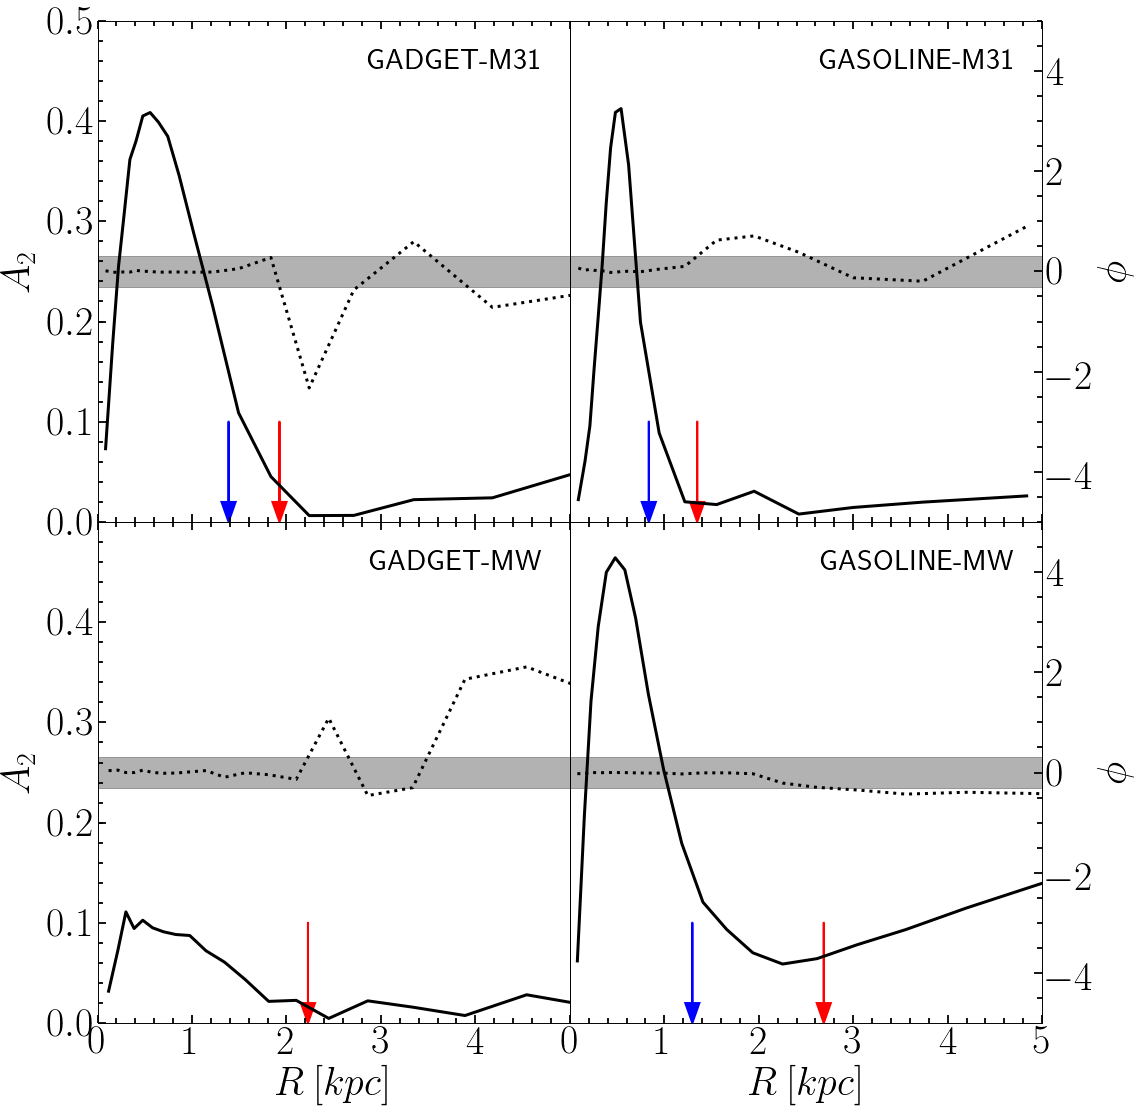

In [14]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

# fig=plt.figure(1,figsize=(16,16))
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.08, left =0.1, right = 0.92, top = 0.95, wspace=0., hspace= 0)



# ax1=fig.add_subplot(221)

ax[0,0].plot(rn_M31gd ,A2_M31gd,'-', lw=3, color='k')
# ax[0,0].set_xticklabels([])
ax[0,0].set_ylabel(r'$A_{2}$', fontsize=40)
ax[0,0].set_xticks([0,1,2,3,4])
ax[0,0].set_xticklabels([])
ax[0,0].set_ylim(0,0.5)
ax[0,0].set_xlim(0,5)
ax[0,0].minorticks_on()
ax[0,0].tick_params( labelsize=40)
ax[0,0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[0,0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
# ax[0,0].axvline(x=lbar_M31gd, color='b', lw=2, ls=':')
ax[0,0].text(4.7, 0.46, 'GADGET-M31', fontsize=30, color='black', ha='right', va='center')
ax[0,0].arrow( lbar_M31gd, 0.1, 0.0, -0.08,fc='r', ec='r',lw=2,head_width=0.15, head_length=0.02 )
ax[0,0].arrow( lbar_M31gd_2, 0.1, 0.0, -0.08,fc='b', ec='b',lw=2,head_width=0.15, head_length=0.02 )

ax00 = ax[0,0].twinx()
ax00.plot(rn_M31gd,phi_M31gd,':', lw=3, color='k')
# ax00.axvline(x=lbar_M31gd, color='b', lw=2, ls=':')
# ax00.set_ylabel(r'$\phi$', fontsize=40)#, color='b')
ax00.set_yticklabels([])
# ax00.set_xlabel(r'$R\:[kpc]$', fontsize=40)
# ax[1,0].set_xticklabels([])
ax00.set_yticks([])
ax00.set_ylim(-5,5)
ax00.set_xlim(0,5)
ax00.minorticks_on()
# ax00.spines['right'].set_color('b')
ax00.tick_params( labelsize=40)#, color='b')
ax00.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on', color='k')
ax00.tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on', color='k')
ax00.fill_between([-1,6],np.arcsin(0.3),-np.arcsin(0.3), color='k', alpha=0.3)

#------------------------------------------------------

# ax2=fig.add_subplot(222)
ax[0,1].plot(rn_M31gs,A2_M31gs,'-', lw=3, color='k')
# ax[0,1].set_xticklabels([])
ax[0,1].set_yticks([])
ax[0,1].set_xticks([0,1,2,3,4,5])
ax[0,1].set_xticklabels([])
# ax[0,1].set_ylabel(r'$A_{2}$', fontsize=40)
ax[0,1].set_ylim(0,0.5)
ax[0,1].set_xlim(0,5)
ax[0,1].minorticks_on()
ax[0,1].tick_params( labelsize=40)
ax[0,1].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[0,1].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
# ax[0,1].axvline(x=lbar_M31gs, color='b', lw=2, ls=':')
ax[0,1].text(4.7, 0.46, 'GASOLINE-M31', fontsize=30, color='black', ha='right', va='center')
ax[0,1].arrow( lbar_M31gs, 0.1, 0.0, -0.08,fc='r', ec='r',lw=2,head_width=0.15, head_length=0.02 )
ax[0,1].arrow( lbar_M31gs_2, 0.1, 0.0, -0.08,fc='b', ec='b',lw=2,head_width=0.15, head_length=0.02 )

ax01 = ax[0,1].twinx()
ax01.plot(rn_M31gs,phi_M31gs,':', lw=3, color='k')
# ax01.axvline(x=lbar_M31gs, color='b', lw=2, ls=':')
# ax[1,1].set_xticklabels([])
# ax01.set_yticklabels([])
ax01.set_ylabel(r'$\phi$', fontsize=40)#, color='b')
# ax01.set_xlabel(r'$R\:[kpc]$', fontsize=40)
ax01.set_yticks([-4,-2,0,2,4])
ax01.set_ylim(-5,5)
ax01.set_xlim(0,5)
ax01.minorticks_on()
# ax01.spines['right'].set_color('b')
ax01.tick_params( labelsize=40)#, color='b')
ax01.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on', color='k')
ax01.tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on', color='k')
ax01.fill_between([-1,6],np.arcsin(0.3),-np.arcsin(0.3), color='k', alpha=0.3)

# #---------------------------------------------------------

# ax3=fig.add_subplot(223)
ax[1,0].plot(rn_MWgd ,A2_MWgd,'-', lw=3, color='k')
ax[1,0].set_xticks([0,1,2,3,4])
ax[1,0].set_yticks([0.0,0.1,0.2,0.3,0.4])
ax[1,0].set_ylabel(r'$A_{2}$', fontsize=40)
ax[1,0].set_xlabel(r'$R\:[kpc]$', fontsize=40)
ax[1,0].set_ylim(0,0.5)
ax[1,0].set_xlim(0,5)
ax[1,0].minorticks_on()
ax[1,0].tick_params( labelsize=40)
ax[1,0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[1,0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
# ax[2,0].axvline(x=lbar_MWgd, color='r', lw=2, ls='--')
ax[1,0].text(4.7, 0.46, 'GADGET-MW', fontsize=30, color='black', ha='right', va='center')
ax[1,0].arrow( lbar_MWgd, 0.1, 0.0, -0.08,fc='r', ec='r',lw=2,head_width=0.15, head_length=0.02 )
ax[1,0].arrow( lbar_MWgd_2, 0.1, 0.0, -0.08,fc='b', ec='b',lw=2,head_width=0.15, head_length=0.02 )

ax10 = ax[1,0].twinx()
ax10.plot(rn_MWgd,phi_MWgd,':', lw=3, color='k')
# ax20.axvline(x=lbar_MWgd, color='r', lw=2, ls='--')
# ax10.set_ylabel(r'$\phi$', fontsize=40)
# ax10.set_xlabel(r'$R\:[kpc]$', fontsize=40)#, color='b')
ax10.set_yticks([])
ax10.set_ylim(-5,5)
ax10.set_xlim(0,5)
ax10.minorticks_on()
# ax01.spines['right'].set_color('b')
ax10.tick_params( labelsize=40)#, color='b')
ax10.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on', color='k')
ax10.tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on', color='k')
ax10.fill_between([-1,6],np.arcsin(0.3),-np.arcsin(0.3), color='k', alpha=0.3)


# # #---------------------------------------------------------------------------------------
# # ax4=fig.add_subplot(224)
ax[1,1].plot(rn_MWgs ,A2_MWgs,'-', lw=3, color='k')
# ax[2,1].set_xticklabels([])
ax[1,1].set_yticks([])
ax[1,1].set_xticks([0,1,2,3,4,5])
ax[1,1].set_xlabel(r'$R\:[kpc]$', fontsize=40)
ax[1,1].set_ylim(0,0.5)
ax[1,1].set_xlim(0,5)
ax[1,1].minorticks_on()
ax[1,1].tick_params( labelsize=40)
ax[1,1].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[1,1].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
# ax[2,1].axvline(x=lbar_MWgs, color='r', lw=2, ls='--')
ax[1,1].text(4.7, 0.46, 'GASOLINE-MW', fontsize=30, color='black', ha='right', va='center')
ax[1,1].arrow( lbar_MWgs, 0.1, 0.0, -0.08,fc='r', ec='r',lw=2,head_width=0.15, head_length=0.02 )
ax[1,1].arrow( lbar_MWgs_2, 0.1, 0.0, -0.08,fc='b', ec='b',lw=2,head_width=0.15, head_length=0.02 )

ax11 = ax[1,1].twinx()
ax11.plot(rn_MWgs,phi_MWgs,':', lw=3, color='k')
# ax[3,1].axvline(x=lbar_MWgs, color='r', lw=2, ls='--')
# ax11.set_xlabel(r'$R\:[kpc]$', fontsize=40)#, color='b')
ax11.set_ylabel(r'$\phi$', fontsize=40)#, color='b')
ax11.set_yticks([-4,-2,0, 2,4])
ax11.set_ylim(-5,5)
ax11.set_xlim(0,5)
ax11.minorticks_on()
# ax01.spines['right'].set_color('b')
ax11.tick_params( labelsize=40)#, color='b')
ax11.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on', color='k')
ax11.tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on', color='k')
ax11.fill_between([-1,6],np.arcsin(0.3),-np.arcsin(0.3), color='k', alpha=0.3)

fig.savefig('/home/ornela/Dropbox/Presentacion_graficos/A2_phi_vsR.png', dpi = 100, xxbox_inches='tight')
# #fig.savefig('/home/ornela/Escritorio/mi_tesis/Figures/GD_'+str('%s'%vector4[i])+'-Vc.png', dpi = 100)
# #fig.savefig('/home/ornela/Escritorio/presentacion_final/GD_'+str('%s'%vector4[i])+'-Vc.png', dpi = 100)
plt.show()

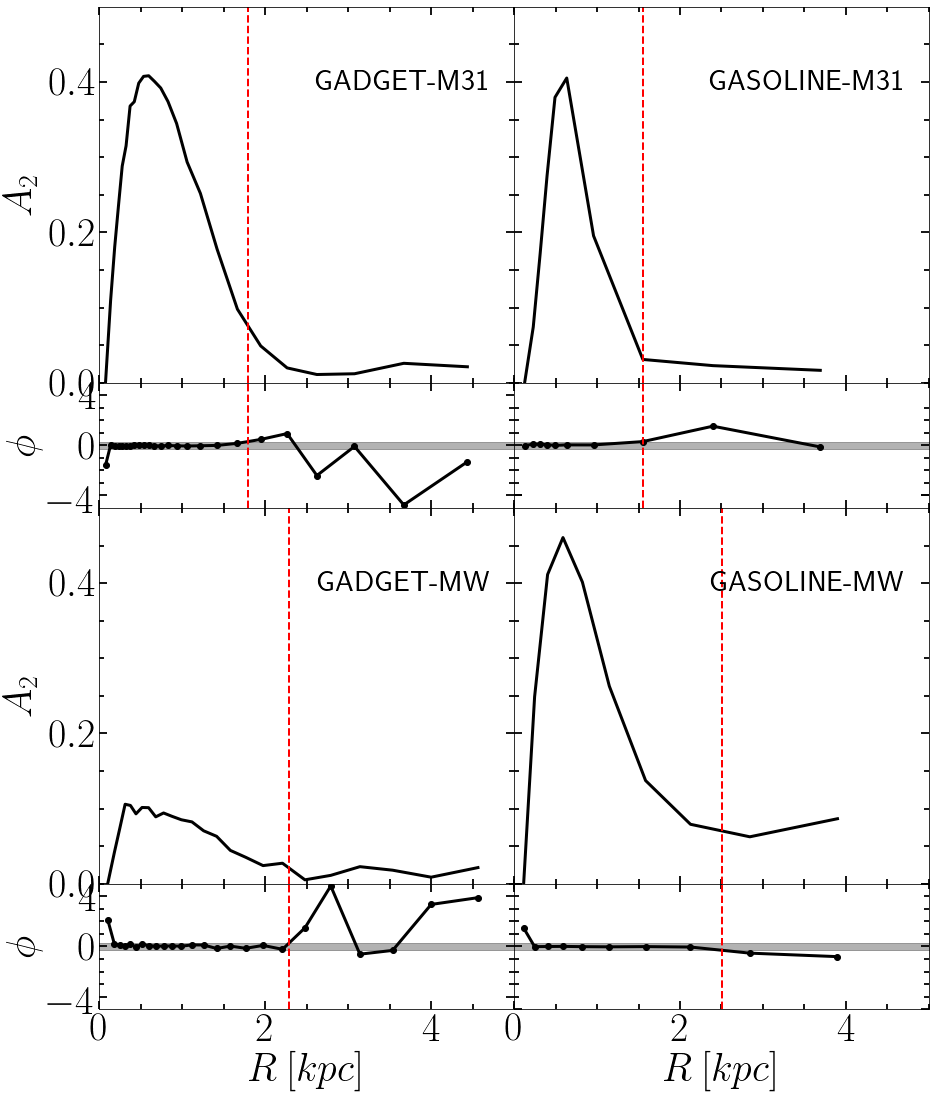

In [88]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

# fig=plt.figure(1,figsize=(16,16))
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(16, 16), sharex=True,
                       gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.08, left =0.2, right = 0.92, top = 0.95, wspace=0., hspace= 0)



# ax1=fig.add_subplot(221)

ax[0,0].plot(rn_M31gd ,A2_M31gd,'-', lw=3, color='k')
# ax[0,0].set_xticklabels([])
ax[0,0].set_ylabel(r'$A_{2}$', fontsize=40)
ax[0,0].set_ylim(0,0.5)
ax[0,0].set_xlim(0,5)
ax[0,0].minorticks_on()
ax[0,0].tick_params( labelsize=40)
ax[0,0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[0,0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
ax[0,0].axvline(x=lbar_M31gd, color='r', lw=2, ls='--')
ax[0,0].text(4.7, 0.4, 'GADGET-M31', fontsize=30, color='black', ha='right', va='center')

# ax01 = ax1.twinx()
ax[1,0].plot(rn_M31gd,phi_M31gd,'o-', lw=3, color='k')
ax[1,0].axvline(x=lbar_M31gd, color='r', lw=2, ls='--')
ax[1,0].set_ylabel(r'$\phi$', fontsize=40)#, color='b')
# ax[1,0].set_xticklabels([])
ax[1,0].set_yticks([-4,0,4])
ax[1,0].set_ylim(-5,5)
ax[1,0].set_xlim(0,5)
ax[1,0].minorticks_on()
# ax01.spines['right'].set_color('b')
ax[1,0].tick_params( labelsize=40)#, color='b')
ax[1,0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on', color='k')
ax[1,0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on', color='k')
ax[1,0].fill_between([-1,6],np.arcsin(0.3),-np.arcsin(0.3), color='k', alpha=0.3)




#------------------------------------------------------

# ax2=fig.add_subplot(222)
ax[0,1].plot(rn_M31gs,A2_M31gs,'-', lw=3, color='k')
# ax[0,1].set_xticklabels([])
ax[0,1].set_yticklabels([])
# ax[0,1].set_ylabel(r'$A_{2}$', fontsize=40)
ax[0,1].set_ylim(0,0.5)
ax[0,1].set_xlim(0,5)
ax[0,1].minorticks_on()
ax[0,1].tick_params( labelsize=40)
ax[0,1].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[0,1].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
ax[0,1].axvline(x=lbar_M31gs, color='r', lw=2, ls='--')
ax[0,1].text(4.7, 0.4, 'GASOLINE-M31', fontsize=30, color='black', ha='right', va='center')

# ax01 = ax1.twinx()
ax[1,1].plot(rn_M31gs,phi_M31gs,'o-', lw=3, color='k')
ax[1,1].axvline(x=lbar_M31gs, color='r', lw=2, ls='--')
# ax[1,1].set_xticklabels([])
ax[1,1].set_yticklabels([])
# ax[1,1].set_ylabel(r'$\phi$', fontsize=40)#, color='b')
ax[1,1].set_yticks([-4,0,-4])
ax[1,1].set_ylim(-5,5)
ax[1,1].set_xlim(0,5)
ax[1,1].minorticks_on()
# ax01.spines['right'].set_color('b')
ax[1,1].tick_params( labelsize=40)#, color='b')
ax[1,1].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on', color='k')
ax[1,1].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on', color='k')
ax[1,1].fill_between([-1,6],np.arcsin(0.3),-np.arcsin(0.3), color='k', alpha=0.3)

# #---------------------------------------------------------

# ax3=fig.add_subplot(223)
ax[2,0].plot(rn_MWgd ,A2_MWgd,'-', lw=3, color='k')
# ax[2,0].set_xticklabels([])
ax[2,0].set_ylabel(r'$A_{2}$', fontsize=40)
ax[2,0].set_ylim(0,0.5)
ax[2,0].set_xlim(0,5)
ax[2,0].minorticks_on()
ax[2,0].tick_params( labelsize=40)
ax[2,0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[2,0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
ax[2,0].axvline(x=lbar_MWgd, color='r', lw=2, ls='--')
ax[2,0].text(4.7, 0.4, 'GADGET-MW', fontsize=30, color='black', ha='right', va='center')

# ax01 = ax1.twinx()
ax[3,0].plot(rn_MWgd,phi_MWgd,'o-', lw=3, color='k')
ax[3,0].axvline(x=lbar_MWgd, color='r', lw=2, ls='--')
ax[3,0].set_ylabel(r'$\phi$', fontsize=40)
ax[3,0].set_xlabel(r'$R\:[kpc]$', fontsize=40)#, color='b')
ax[3,0].set_yticks([-4,0,4])
ax[3,0].set_ylim(-5,5)
ax[3,0].set_xlim(0,5)
ax[3,0].minorticks_on()
# ax01.spines['right'].set_color('b')
ax[3,0].tick_params( labelsize=40)#, color='b')
ax[3,0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on', color='k')
ax[3,0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on', color='k')
ax[3,0].fill_between([-1,6],np.arcsin(0.3),-np.arcsin(0.3), color='k', alpha=0.3)


# #---------------------------------------------------------------------------------------
# ax4=fig.add_subplot(224)
ax[2,1].plot(rn_MWgs ,A2_MWgs,'-', lw=3, color='k')
# ax[2,1].set_xticklabels([])
ax[2,1].set_yticklabels([])
ax[2,1].set_ylim(0,0.5)
ax[2,1].set_xlim(0,5)
ax[2,1].minorticks_on()
ax[2,1].tick_params( labelsize=40)
ax[2,1].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[2,1].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
ax[2,1].axvline(x=lbar_MWgs, color='r', lw=2, ls='--')
ax[2,1].text(4.7, 0.4, 'GASOLINE-MW', fontsize=30, color='black', ha='right', va='center')

# ax01 = ax1.twinx()
ax[3,1].plot(rn_MWgs,phi_MWgs,'o-', lw=3, color='k')
ax[3,1].axvline(x=lbar_MWgs, color='r', lw=2, ls='--')
ax[3,1].set_xlabel(r'$R\:[kpc]$', fontsize=40)#, color='b')
ax[3,1].set_yticklabels([])
ax[3,1].set_ylim(-5,5)
ax[3,1].set_xlim(0,5)
ax[3,1].minorticks_on()
# ax01.spines['right'].set_color('b')
ax[3,1].tick_params( labelsize=40)#, color='b')
ax[3,1].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on', color='k')
ax[3,1].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on', color='k')
ax[3,1].fill_between([-1,6],np.arcsin(0.3),-np.arcsin(0.3), color='k', alpha=0.3)

fig.savefig('/home/ornela/Dropbox/Presentacion_graficos/A2_phi_vsR.png', dpi = 100, xxbox_inches='tight')
# #fig.savefig('/home/ornela/Escritorio/mi_tesis/Figures/GD_'+str('%s'%vector4[i])+'-Vc.png', dpi = 100)
# #fig.savefig('/home/ornela/Escritorio/presentacion_final/GD_'+str('%s'%vector4[i])+'-Vc.png', dpi = 100)
plt.show()
